# 상장리츠데이터를 활용한 부동산 포트폴리오 배분
개요: 마코위츠의 포트폴리오이론을 이용하여 부동산 섹터별 포트폴리오 배분전략을 수립
가정: 각 리츠의 퍼포먼스가 각 리츠가 담고있는 자산의 퍼포먼스를 대변한다
데이터: 상장리츠 일별 종가중 
  - 복합리츠 제외
  - 너무 최근에 상장된 리츠 제외

In [18]:
# 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [3]:
# 데이터 로드 / 가공
# 출처: 한국공인회계사회
reits_rate = pd.read_excel('reits_rate.xlsx') # 종목 일별수익률
reits_sp = pd.read_excel('reits_sp.xlsx')

In [8]:
reits_rate['일자'] = pd.to_datetime(reits_rate['일자'].apply(lambda x : str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:]))

In [9]:
reits_rate.set_index('일자', inplace = True)

In [11]:
# 종목 일별수익률간 상관관계
reits_rate.corr()

,ESR종목수익률,에너지리츠종목수익률,맵스종목수익률,이지스레지던스종목수익률,NH프라임종목수익률,신한알파종목수익률,이리츠종목수익률,에이리츠종목수익률,KOSPI수익률
ESR종목수익률,1.000000,0.339665,0.373436,0.349494,0.289733,0.180031,0.361342,0.147839,0.280259
에너지리츠종목수익률,0.339665,1.000000,0.406357,0.423205,0.366570,0.254984,0.376975,0.119575,0.286701
맵스종목수익률,0.373436,0.406357,1.000000,0.462016,0.421090,0.293211,0.380020,0.120067,0.295700
이지스레지던스종목수익률,0.349494,0.423205,0.462016,1.000000,0.337269,0.231133,0.472116,0.147062,0.286031
NH프라임종목수익률,0.289733,0.366570,0.421090,0.337269,1.000000,0.232391,0.298002,0.099138,0.201952
신한알파종목수익률,0.180031,0.254984,0.293211,0.231133,0.232391,1.000000,0.311597,0.109959,0.142118
이리츠종목수익률,0.361342,0.376975,0.380020,0.472116,0.298002,0.311597,1.000000,0.164184,0.262554
에이리츠종목수익률,0.147839,0.119575,0.120067,0.147062,0.099138,0.109959,0.164184,1.000000,0.194643
KOSPI수익률,0.280259,0.286701,0.295700,0.286031,0.201952,0.142118,0.262554,0.194643,1.000000


In [22]:
reits_rate.describe().loc[['mean','std']].T.reset_index()

,index,mean,std
0,ESR종목수익률,-0.026044,1.646759
1,에너지리츠종목수익률,0.033015,0.996977
2,맵스종목수익률,-0.062784,0.792120
3,이지스레지던스종목수익률,-0.041423,0.832602
4,NH프라임종목수익률,-0.001038,0.859117
5,신한알파종목수익률,-0.015344,0.903486
6,이리츠종목수익률,-0.008727,0.901094
7,에이리츠종목수익률,-0.067169,2.893525
8,KOSPI수익률,-0.007125,1.057162


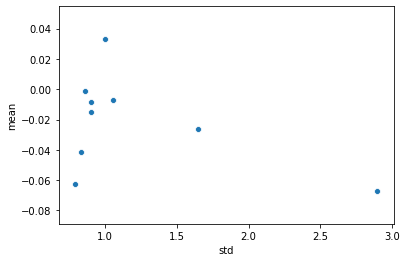

In [19]:
sns.scatterplot(data = reits_rate.describe().loc[['mean','std']].T, x = 'std', y = 'mean')

In [30]:
circle = alt.Chart(reits_rate.describe().loc[['mean','std']].T.drop('KOSPI수익률')).mark_circle().encode(
    x = alt.X('std'),
    y = alt.Y('mean')
)

text = alt.Chart(reits_rate.describe().loc[['mean','std']].T.drop('KOSPI수익률').reset_index()).mark_text(align='left', baseline='line-top').encode(
    x = 'std',
    y = 'mean',
    text = 'index'
    
)

(circle + text).properties(width = 600, height = 400)

alt.LayerChart(...)

In [37]:
r2 = reits_rate.drop(['KOSPI수익률','ESR종목수익률','에이리츠종목수익률'], axis = 1)

In [38]:
len(r2.columns)

6

In [39]:
10**6

1000000

In [45]:
from scipy.stats import dirichlet

X = dirichlet((1,1,1,1,1,1)).rvs(1000)
X[:3]

array([[0.05552352, 0.38179397, 0.17167064, 0.11644309, 0.21061717,
        0.06395162],
       [0.16265969, 0.09265758, 0.26096135, 0.01388896, 0.22973893,
        0.24009349],
       [0.39889187, 0.06942612, 0.23166257, 0.00059449, 0.27935657,
        0.02006837]])

In [75]:
k = {}
r2  

,에너지리츠종목수익률,맵스종목수익률,이지스레지던스종목수익률,NH프라임종목수익률,신한알파종목수익률,이리츠종목수익률
일자,,,,,,
2023-07-13,0.894454,0.946372,1.328021,-0.833333,0.324675,2.805611
2023-07-12,0.179211,0.000000,-0.132626,-0.473934,0.000000,-0.597610
2023-07-11,-0.178891,0.316456,-0.658762,0.836320,-0.162075,-0.198807
2023-07-10,-0.533808,0.317460,-0.262812,-1.063830,0.000000,-0.592885
2023-07-07,-0.354610,-2.777778,-0.131234,-1.052632,-0.803859,-0.978474
...,...,...,...,...,...,...
2021-01-05,0.084674,-0.741525,0.412797,-0.351700,0.286533,-0.371747
2021-01-04,-0.190154,-0.736067,-1.624365,0.000000,-0.838187,-0.554529
2020-12-30,-0.105530,-0.105042,0.000000,-0.117096,0.284941,-0.184502


In [56]:
reits_sp['일자'] = pd.to_datetime(reits_sp['일자'].apply(lambda x : str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:]))
reits_sp.set_index('일자', inplace = True)

In [99]:
rs2 = reits_sp.drop(['KOSPI종가','ESR종목종가','에이리츠'], axis = 1)
k = {}
for idx, i in enumerate(X):
    _x = (rs2 * i).sum(axis = 1).pct_change(periods = -1).dropna()*100
    k[idx] = {}
    k[idx]['mean'] = _x.mean()
    k[idx]['std'] = _x.std()

In [102]:
portfolio = pd.DataFrame(k).T

In [103]:
portfolio.head()

,mean,std
0,-0.031936,0.592466
1,-0.017313,0.624132
2,-0.006394,0.672689
3,-0.012688,0.659646
4,-0.009382,0.651984


In [153]:
#720 / 541
p2_annot = portfolio.loc[[541]]
p2_annot['text'] = '적정포트폴리오'
p2_annot

,mean,std,text
541,0.00544,0.679612,적정포트폴리오


In [128]:
p2_annot2 = p2_annot.copy()
p2_annot2['mean'] = -0.02
p2_annot2['std'] = 0.62
p2_annot2['text'] = '잠재포트폴리오집단'

In [155]:
circle = alt.Chart(reits_rate.describe().loc[['mean','std']].T.drop(['KOSPI수익률','ESR종목수익률','에이리츠종목수익률'])).mark_circle().encode(
    x = alt.X('std', scale=alt.Scale(domain=[0.5, 1.15])),
    y = alt.Y('mean')
)

text = alt.Chart(reits_rate.describe().loc[['mean','std']].T.drop((['KOSPI수익률','ESR종목수익률','에이리츠종목수익률'])).reset_index()).mark_text(align='left', baseline='line-top').encode(
    x = 'std',
    y = 'mean',
    text = 'index'    
)

circle2 = alt.Chart(portfolio).mark_circle(color = 'green').encode(
    x = 'std',
    y = 'mean'
)

circle3 = alt.Chart(portfolio.loc[[541]]).mark_circle(color = 'red', size = 200).encode(
    x = 'std',
    y = 'mean' 
)

text2 = alt.Chart(p2_annot).mark_text(align='right').encode(
    x = 'std',
    y = 'mean',
    text = alt.Text('text')    
)

text3 = alt.Chart(p2_annot2).mark_text(align='left', size = 15, color = 'black', fontWeight = 'bold').encode(
    x = 'std',
    y = 'mean',
    text = alt.Text('text')    
)

(circle + text + circle2 + circle3 + text2 + text3).properties(width = 600, height = 400)

alt.LayerChart(...)

In [119]:
portfolio.loc[lambda x : x['mean'] >= 0.009]
portfolio.loc[[720]]

,mean,std
720,0.010222,0.715922


In [140]:
X[720]

array([0.49340669, 0.0164097 , 0.02970042, 0.2700437 , 0.06713302,
       0.12330647])

In [147]:
portfolio2 = pd.DataFrame(X)
portfolio2.columns = r2.columns

In [149]:
portfolio2.loc[720]

에너지리츠종목수익률      0.493407
맵스종목수익률         0.016410
이지스레지던스종목수익률    0.029700
NH프라임종목수익률      0.270044
신한알파종목수익률       0.067133
이리츠종목수익률        0.123306
Name: 720, dtype: float64

In [151]:
portfolio.loc[lambda x : x['mean'] >= 0.005]
portfolio.loc[[541]]

,mean,std
541,0.00544,0.679612


In [152]:
portfolio2.loc[541]

에너지리츠종목수익률      0.387743
맵스종목수익률         0.004819
이지스레지던스종목수익률    0.071809
NH프라임종목수익률      0.395246
신한알파종목수익률       0.113104
이리츠종목수익률        0.027279
Name: 541, dtype: float64

In [157]:
portfolio2.to_excel('portfolio2.xlsx')

In [ ]:
r3 = reits_rate.drop(['KOSPI수익률'], axis = 1)

In [161]:
X2 = dirichlet((1,1,1,1,1,1,1,1)).rvs(1000)
X2[:3]

array([[0.21721699, 0.11349373, 0.1801651 , 0.03244092, 0.26228772,
        0.06718722, 0.06945323, 0.05775509],
       [0.05015991, 0.29369063, 0.08134247, 0.00215996, 0.18128515,
        0.12762724, 0.24695544, 0.0167792 ],
       [0.18836848, 0.00435603, 0.04135546, 0.49989694, 0.06785936,
        0.15497246, 0.01037981, 0.03281145]])

In [162]:
rs3 = reits_sp.drop(['KOSPI종가'], axis = 1)
k2 = {}
for idx, i in enumerate(X2):
    _x = (rs3 * i).sum(axis = 1).pct_change(periods = -1).dropna()*100
    k2[idx] = {}
    k2[idx]['mean'] = _x.mean()
    k2[idx]['std'] = _x.std()

In [163]:
portfolio_2 = pd.DataFrame(k).T

In [164]:
portfolio_2.head()

,mean,std
0,-0.031936,0.592466
1,-0.017313,0.624132
2,-0.006394,0.672689
3,-0.012688,0.659646
4,-0.009382,0.651984


In [177]:
circle = alt.Chart(reits_rate.describe().loc[['mean','std']].T.drop(['KOSPI수익률'])).mark_circle().encode(
    x = alt.X('std', scale=alt.Scale(domain=[0.5, 2])),
    y = alt.Y('mean')
)

text = alt.Chart(reits_rate.describe().loc[['mean','std']].T.drop((['KOSPI수익률'])).reset_index()).mark_text(align='left', baseline='line-top').encode(
    x = 'std',
    y = 'mean',
    text = 'index'    
)

circle2 = alt.Chart(portfolio_2).mark_circle(color = 'green').encode(
    x = 'std',
    y = 'mean'
)

(circle + text + circle2).properties(width = 600, height = 400)

alt.LayerChart(...)

In [173]:
portfolio_2.loc[lambda x : x['mean'] >= 0.005]
portfolio_2.loc[[541]]

,mean,std
541,0.00544,0.679612


In [174]:
X2[541]

array([0.28907698, 0.080617  , 0.01139767, 0.13830598, 0.09822541,
       0.05529907, 0.20043914, 0.12663874])

In [176]:
rs3.columns

Index(['ESR종목종가', '에너지리츠종목종가', '맵스종목종가', '이지스레지던스종목종가', 'NH프라임종목종가',
       '신한알파종목종가', '이리츠종목종가', '에이리츠'],
      dtype='object')